In [11]:
!pip install keras

Defaulting to user installation because normal site-packages is not writeable


In [12]:
!pip install tensorflow

Defaulting to user installation because normal site-packages is not writeable


In [2]:
import tensorflow as tf # Print tensorflow version
print(tf.__version__)

2.17.0


In [21]:
from tensorflow import keras # Print keras version
print(keras.__version__)

3.5.0


In [17]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras import datasets, layers, models
from keras.datasets import fashion_mnist
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.utils import to_categorical

In [18]:
# Load the Fashion MNIST dataset
(x_train, y_train), (x_test, y_test) = datasets.fashion_mnist.load_data()

# Check the shapes of the datasets
print(f'Training data shape: {x_train.shape}')  # (60000, 28, 28)
print(f'Training labels shape: {y_train.shape}')  # (60000,)
print(f'Test data shape: {x_test.shape}')  # (10000, 28, 28)
print(f'Test labels shape: {y_test.shape}')  # (10000,)

Training data shape: (60000, 28, 28)
Training labels shape: (60000,)
Test data shape: (10000, 28, 28)
Test labels shape: (10000,)


In [19]:
# Normalize the data
x_train, x_test = x_train / 255.0, x_test / 255.0

# Preprocess (Reshape) the data to add the channel dimension
x_train = x_train.reshape((x_train.shape[0], 28, 28, 1)).astype('float32') / 255
x_test = x_test.reshape((x_test.shape[0], 28, 28, 1)).astype('float32') / 255

# Convert labels to one-hot encoding
y_train_categorical = to_categorical(y_train)
y_test_categorical = to_categorical(y_test)


Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 49s 18ms/step - accuracy: 0.1014 - loss: 2.3028 - val_accuracy: 0.1000 - val_loss: 2.3026
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 33s 17ms/step - accuracy: 0.0964 - loss: 2.3028 - val_accuracy: 0.1000 - val_loss: 2.3026
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 34s 18ms/step - accuracy: 0.0980 - loss: 2.3026 - val_accuracy: 0.1000 - val_loss: 2.3027
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 32s 17ms/step - accuracy: 0.1034 - loss: 2.3026 - val_accuracy: 0.1000 - val_loss: 2.3026
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 32s 17ms/step - accuracy: 0.0987 - loss: 2.3027 - val_accuracy: 0.1000 - val_loss: 2.3027
313/313 - 2s - 6ms/step - accuracy: 0.1000 - loss: 2.3027
Test accuracy: 0.10000000149011612
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step


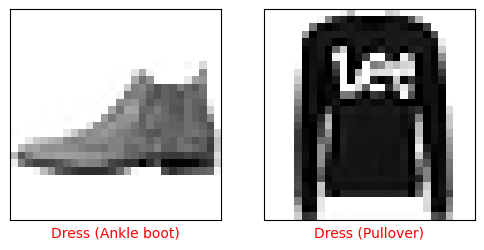

In [20]:
# Define the CNN model
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(10, activation='softmax')  # 10 classes for Fashion MNIST
])

# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
model.fit(x_train, y_train_categorical, epochs=5, validation_data=(x_test, y_test_categorical))

# Evaluate the model
test_loss, test_accuracy = model.evaluate(x_test, y_test_categorical, verbose=2)
print(f'Test accuracy: {test_accuracy}')

# Make predictions on the test data
predictions = model.predict(x_test)

# Function to plot the image and prediction
def plot_image(i, predictions_array, true_label, img):
    true_label, img = true_label[i], img[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])

    plt.imshow(img, cmap=plt.cm.binary)

    predicted_label = np.argmax(predictions_array)
    if predicted_label == true_label:
        color = 'blue'
    else:
        color = 'red'

    plt.xlabel(f"{class_names[predicted_label]} ({class_names[true_label]})", color=color)

# Class names for Fashion MNIST
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

# Plot two test images and their predictions
plt.figure(figsize=(6, 3))
for i in range(2):
    plt.subplot(1, 2, i+1)
    plot_image(i, predictions[i], y_test, x_test)
plt.show()